## 1. INTRODUCTION: IMAGE

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
img = cv.imread("dahyun.jpg", 0)

In [4]:
cv.imshow('Dahyun', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [17]:
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv.imwrite('dahyungray.png',img)
    cv.destroyAllWindows()

### Using Matplotlib

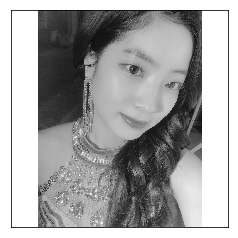

In [29]:
plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## 2. INTRODUCTION: VIDEO

### For capturing Live video or Captured video

In [ ]:
live = False

if live:
    cap = cv.VideoCapture(0)
else:
    cap = cv.VideoCapture("pyspark.mp4")
    
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    #ret = cap.set(cv.CAP_PROP_FRAME_WIDTH, 320)
    #ret = cap.set(cv.CAP_PROP_FRAME_HEIGHT, 240)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(25) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

### For saving a video.

In [41]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

## Drawing geometric shapes into the image

In [103]:
import numpy as np
import cv2 as cv
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5) #drawing a line
cv.line(img,(511,0),(0,511),(255,0,0),5) #drawing a line
cv.rectangle(img,(130,130),(380,380),(0,255,0),3) #drawing a rectangle
cv.ellipse(img,(256,256),(120,60),0,0,360,255,2)
pts = np.array([[130,256],[256,130],[380,256],[256,380]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255), 3)

### putting a text
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,"Reljod's Drawing",(105,450), font, 1.2,(255,255,255),2,cv.LINE_AA)

cv.imshow("Line", img)
cv.waitKey(0)
cv.destroyAllWindows()

#### Saving..

In [104]:
cv.imwrite("ReljodImg.jpg", img)

True

### Trying to draw a rectangle that fits on the picture's eyes

In [62]:
img = cv.imread("dahyun.jpg", 0)
cv.rectangle(img,(470,240),(585,300),(0,255,0),2)

cv.imshow("Dahyun", img)
cv.waitKey(0)
cv.destroyAllWindows()

#### Saving..

In [63]:
cv.imwrite("DahyunEyeDetection.jpg", img)

True

## Mouse events in OpenCV

In [106]:
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [110]:
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

### Creating a paint w/ Trackbar assistance

In [123]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
size = 1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode,size,color
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),size,color,-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),size,color,-1)

img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
cv.createTrackbar('Size','image',1,10,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    size = cv.getTrackbarPos("Size",'image')
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    color = (b, g, r)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27: ##esc
        break
cv.destroyAllWindows()

### Trackbar specifying image color

In [124]:
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image')
# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows()